y# Analyzing the downloaded data

## Assumptions

You have used the `download_stenos.py` and `generate_pandas.py` to download the steno protocols and save them into a compressed pickle.

I have them under ./data/ folder, you will have to adjust the paths accordingly to your storage location.

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

df1993 = pd.read_csv('./data/psp1993_1996.tsv.xz', sep='\t', header=0, encoding='utf-8', compression='xz')
df1996 = pd.read_csv('./data/psp1996_1998.tsv.xz', sep='\t', header=0, encoding='utf-8', compression='xz')
df1998 = pd.read_csv('./data/psp1998_2002.tsv.xz', sep='\t', header=0, encoding='utf-8', compression='xz')
df2002 = pd.read_csv('./data/psp2002_2006.tsv.xz', sep='\t', header=0, encoding='utf-8', compression='xz')
df2006 = pd.read_csv('./data/psp2006_2010.tsv.xz', sep='\t', header=0, encoding='utf-8', compression='xz')
df2010 = pd.read_csv('./data/psp2010_2013.tsv.xz', sep='\t', header=0, encoding='utf-8', compression='xz')
df2017 = pd.read_csv('./data/psp2017_2021.tsv.xz', sep='\t', header=0, encoding='utf-8', compression='xz')
df2013 = pd.read_csv('./data/psp2013_2017.tsv.xz', sep='\t', header=0, encoding='utf-8', compression='xz')

print("Pandas version: {}".format(pd.__version__))

df2017.columns

Pandas version: 1.0.5


Index(['session', 'date', 'topic_idx', 'topic_str', 'order', 'name',
       'steno_name', 'file_name', 'tokens', 'birthyear', 'age', 'sex',
       'titles', 'party', 'text'],
      dtype='object')

The data frame contains interventions in each two and the following columns:
   
   - 'session', 'date', 'topic_idx', 'topic_str', 'order', 
     The session, the date of the session, the topic being discussed, and the order of intervention for the session
   
   - 'name','steno_name', 
     The name of the speacker and the string that appears in the steno protocol
   
       - 'age', 'sex', 'titles','party', 'birthday'
       Information about the speaker; `age is the age at the time of the last steno of the dataset`
   
   - 'file_name', 'text', 
     The file name that contains the information, and the text in the filed
   
   - 'tokens', 
     The number of tokens on the unfiltered file


We have loaded all the stenos and metadata from the sessions between 1993 and 2020.

Let's do a sanity check and veorify that there are no dupplicates in the text field (i.e. same content downloaded in two differnt files)

In [2]:

dfs = [(df1993,'df1993'), (df1996,'df1996'),q (df1998,'df1998'),
       (df2002,'df2002'), (df2006,'df2006'), (df2010,'df2010'),
       (df2013,'df2013'), (df2017,'df2017') ]

for df, df_name in dfs:
    dup_count = df.duplicated(["session", "topic_idx", "text"]).sum()
    if dup_count > 0:
        print(f"WARNING: found {dup_count} dupplicates in data set {df_name}")
        print("          Correcting...")
        df = df.drop_duplicates(["session", "topic_idx", "text"], keep='first')
        dup_count = df.duplicated(["session", "topic_idx", "text"]).sum()
        print(f"  {dup_count} dupplicates in data set {df_name} after correction")
    else:
        print(f"No dupplicates in data set {df_name}")


          Correcting...
  0 dupplicates in data set df1993 after correction
No dupplicates in data set df1996


          Correcting...
  0 dupplicates in data set df1998 after correction


          Correcting...
  0 dupplicates in data set df2002 after correction


          Correcting...
  0 dupplicates in data set df2006 after correction
No dupplicates in data set df2010


No dupplicates in data set df2013
          Correcting...


  0 dupplicates in data set df2017 after correction


In [4]:
total_files = 0
total_tokens = 0
for df, df_name in dfs:
    print(f"{df_name}")
    print(f"\tTotal files:  {df['tokens'].count()}")
    print(f"\tTotal tokens: {df['tokens'].sum()}")
    total_files += df['tokens'].count()
    total_tokens += df['tokens'].sum()

print(f"Total number of files in {len(dfs)} datasets = {total_files}")
print(f"Total number of tokens in {len(dfs)} datasets = {total_tokens}")



df1993
	Total files:  11249
	Total tokens: 2537473
df1996
	Total files:  11612
	Total tokens: 2549958
df1998
	Total files:  26566
	Total tokens: 4557336
df2002
	Total files:  26060
	Total tokens: 4609035
df2006
	Total files:  19377
	Total tokens: 3696899
df2010
	Total files:  16559
	Total tokens: 3274592
df2013
	Total files:  31339
	Total tokens: 6179046
df2017
	Total files:  23992
	Total tokens: 4969652
Total number of files in 8 datasets = 166754
Total number of tokens in 8 datasets = 32373991


We can see who are the people that have more tokens, for that we will group the data frame by `name` and sum the tokens. Finally we can take the 10 largest.

In [5]:
top_n = 10

for df, df_name in dfs:
    g_name = df.groupby(["name","party"])
    print(f"\n{df_name}:")
    print(f"\tTotal number of different speakers: {len(g_name)}")
    print(f"\tTop {top_n} speakers by number of tokens for {df_name}\n")
    print(g_name[["party","tokens"]].sum().nlargest(top_n, "tokens"))


df1993:
	Total number of different speakers: 225
	Top 10 speakers by number of tokens for df1993

                          tokens
name             party          
Ivan Kočárník    ODS       85700
Jozef Wagner     ČSSD      83429
Milan Uhde       ODS       64409
Zdeněk Vorlíček  KSČM      47964
Miloslav Výborný KDU-ČSL   44838
Jan Ruml         ODS       43601
Jiří Vlach       ODS       38129
Jiří Vyvadil     ČSSD      38071
Jiří Novák       ODS       37056
Gerta Mazalová   HSD-SMS   36897

df1996:
	Total number of different speakers: 226
	Top 10 speakers by number of tokens for df1996

                           tokens
name              party          
Zdeněk Jičínský   ČSSD      73436
Václav Klaus      ODS       68518
Vojtěch Filip     KSČM      63783
Miroslav Sládek   SPR-RSČ   60726
Josef Krejsa      SPR-RSČ   55629
Jozef Wagner      NOPARTY   54388
Ivan Pilip        ODS       50824
Miloš Zeman       ČSSD      49400
Zdeněk Krampera   SPR-RSČ   44652
Miloslav Ransdorf KSČM      4416

	Total number of different speakers: 290
	Top 10 speakers by number of tokens for df2013

                           tokens
name              party          
Zbyněk Stanjura   ODS      424188
Bohuslav Sobotka  ČSSD     276262
Miroslav Kalousek TOP09    211000
Petr Bendl        ODS      147775
František Laudát  TOP09    129337
Andrej Babiš      ANO2011  124392
Ludvík Hovorka    KDU-ČSL  106155
Vojtěch Filip     KSČM     101538
Michal Kučera     TOP09     98308
Karel Fiedler     Úsvit     91498

df2017:
	Total number of different speakers: 290
	Top 10 speakers by number of tokens for df2017

                           tokens
name              party          
Zbyněk Stanjura   ODS      201719
Alena Schillerová ANO2011  161772
Andrej Babiš      ANO2011  140965
Tomio Okamura     SPD      109937
Jakub Michálek    Piráti   102547
Miroslav Kalousek TOP09     93451
Mikuláš Ferjenčík Piráti    93004
Vojtěch Munzar    ODS       92717
Adam Vojtěch      ANO2011   91717
Marian Jurečka    KDU-ČSL   9

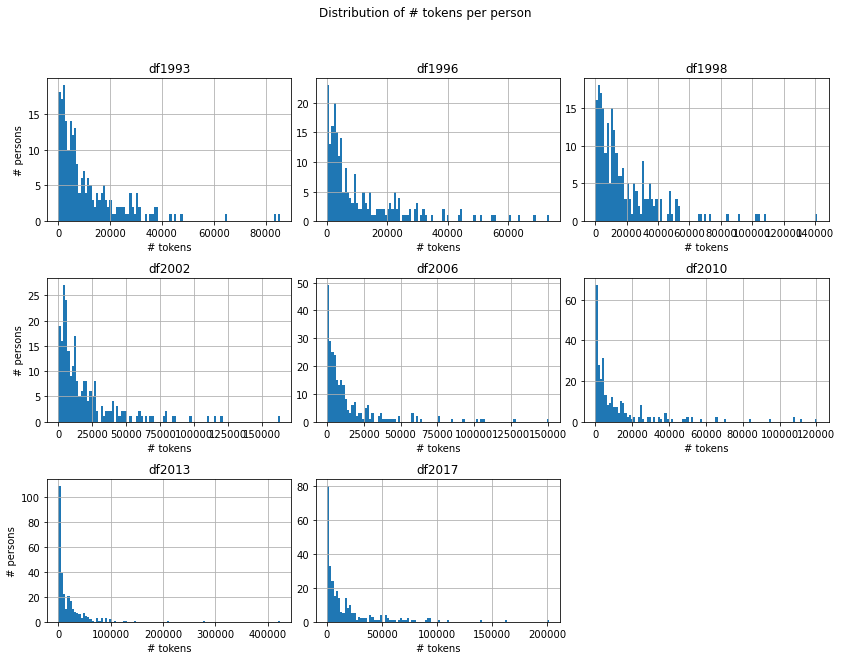

In [6]:
matplotlib.rcParams['figure.figsize'] = [14, 10]

cols = 3
rows = len(dfs)//3
if len(dfs)%3: 
    rows += 1

plt.suptitle("Distribution of # tokens per person")
idx = 1
for df, df_name in dfs:
    

    ax1=plt.subplot(rows, cols, idx)
    df.groupby(["name"])["tokens"].sum().hist(bins=100, ax=ax1)
    plt.title(f"{df_name}")
    if idx%3 == 1:
        plt.ylabel("# persons")
    plt.xlabel('# tokens')
    idx += 1

plt.subplots_adjust(hspace=0.4, wspace=0.1)


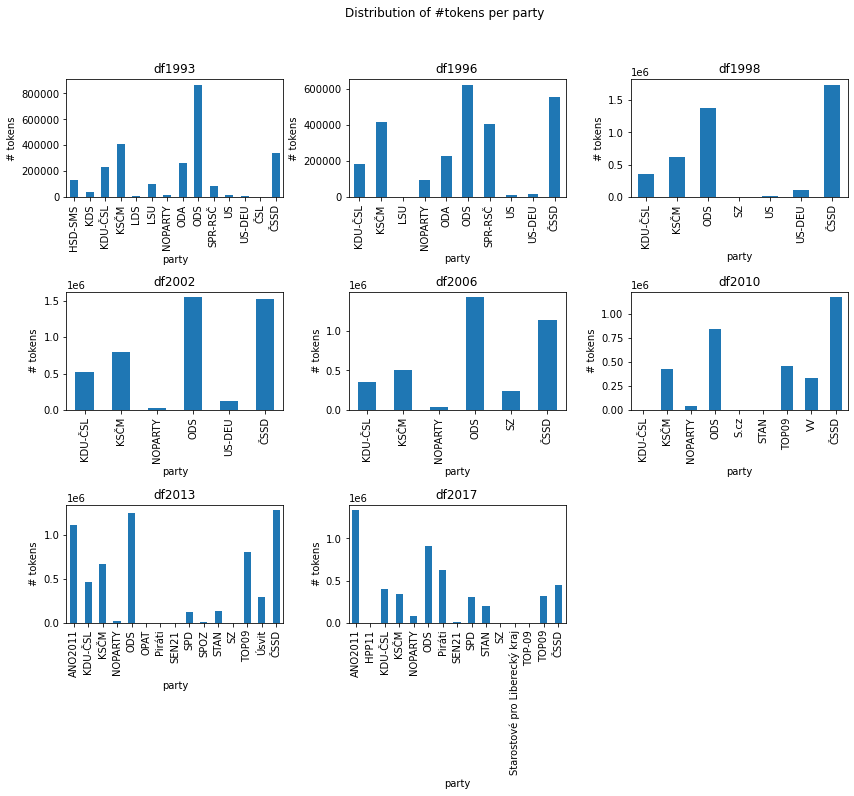

In [7]:

matplotlib.rcParams['figure.figsize'] = [14, 10]
cols = 3
rows = len(dfs)//3
if len(dfs)%3: 
    rows += 1
plt.suptitle('Distribution of #tokens per party')

idx = 1
for df, df_name in dfs:
    

    ax1=plt.subplot(rows, cols, idx)
    kk=df.groupby(["party"])["tokens"].sum().plot.bar(ax=ax1)
    plt.ylabel("# tokens")
    _ = plt.title(f"{df_name}")
    idx += 1
plt.subplots_adjust(hspace=0.8, wspace=0.3)


For our analysis model we need relatively long speaches, we will consider only speeches longer than 500 tokens.

Now let's count how many interventions have more than 1000 tokens

In [8]:
limit = 500

for df, df_name in dfs:
    longdf = df[df["tokens"] > limit]["text"].count()
    longdf_tokens = df[df["tokens"] > limit]["tokens"].sum()
    print(f"{df_name}:")
    print(f"Long interventions (more than {limit} tokens) in {df_name}: {longdf} - total tokens {longdf_tokens} ")


df1993:
Long interventions (more than 500 tokens) in df1993: 1359 - total tokens 1222912 
df1996:
Long interventions (more than 500 tokens) in df1996: 1325 - total tokens 1214233 
df1998:
Long interventions (more than 500 tokens) in df1998: 1764 - total tokens 1203567 
df2002:
Long interventions (more than 500 tokens) in df2002: 1818 - total tokens 1243758 
df2006:
Long interventions (more than 500 tokens) in df2006: 1595 - total tokens 1119608 
df2010:
Long interventions (more than 500 tokens) in df2010: 1507 - total tokens 1063581 
df2013:
Long interventions (more than 500 tokens) in df2013: 2306 - total tokens 1630394 
df2017:
Long interventions (more than 500 tokens) in df2017: 1986 - total tokens 1419465 


If we consider only speeches of 500 tokens we don't end up with a lot of data, let's agregate per speaker per session and topic and check the number of tokens we obtain considering only those speakers that have an aggregated number of tokens per session over 500

In [9]:

limit = 500

cum_files = 0
cum_tokens = 0
for df, df_name in dfs:
    grp = df.groupby(by=["name", "session", "topic_idx"])
    longdf = grp["tokens"].sum()[ grp["tokens"].sum() > limit ].count()
    longdf_tokens = grp["tokens"].sum()[ grp["tokens"].sum() > limit].sum()

    cum_files += longdf
    cum_tokens += longdf_tokens 

    print(f"{df_name}:")
    print(f"Long interventions (more than {limit} tokens) in {df_name}: {longdf} - total tokens {longdf_tokens} ")

print(f"Total files: {cum_files}")
print(f"Total tokens: {cum_tokens}")



df1993:
Long interventions (more than 500 tokens) in df1993: 1578 - total tokens 1586562 
df1996:
Long interventions (more than 500 tokens) in df1996: 1550 - total tokens 1637000 
df1998:
Long interventions (more than 500 tokens) in df1998: 2454 - total tokens 1988044 
df2002:
Long interventions (more than 500 tokens) in df2002: 2624 - total tokens 2212331 
df2006:
Long interventions (more than 500 tokens) in df2006: 2165 - total tokens 2079390 
df2010:
Long interventions (more than 500 tokens) in df2010: 2002 - total tokens 1850575 
df2013:
Long interventions (more than 500 tokens) in df2013: 3668 - total tokens 3616132 
df2017:
Long interventions (more than 500 tokens) in df2017: 3119 - total tokens 3036712 
Total files: 19160
Total tokens: 18006746


Text(0.5, 1.0, 'Tokens per speech in 2017-')

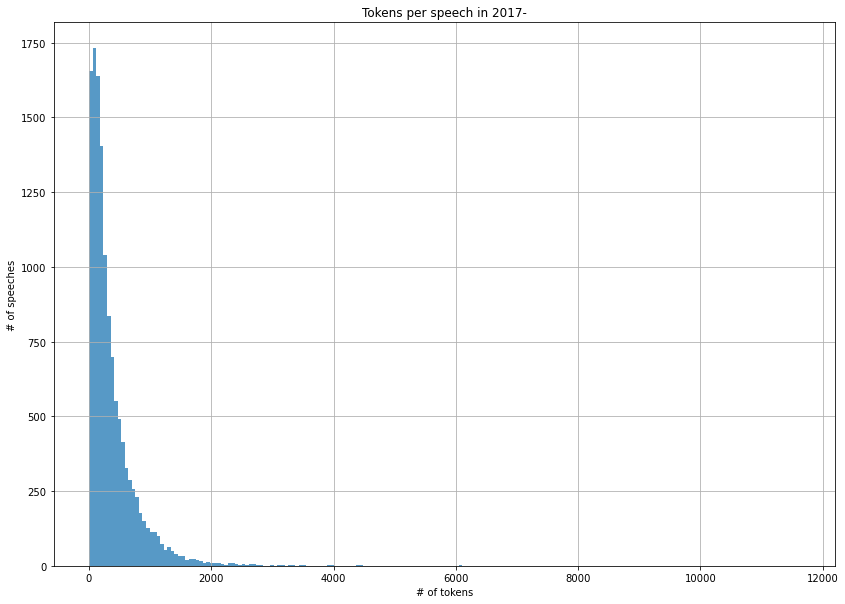

In [10]:
# Create a groupby object and then build a data frame with sum of tokens and appended strings, group by more fields if required
g2017 = df2017.groupby(['session', 'topic_idx', 'name'])
df2017agg = pd.merge(g2017['tokens'].sum(), g2017['text'].sum(), left_index=True, right_index=True).reset_index()
_ = plt.hist(df2017agg['tokens'], bins=200, alpha=0.75)
plt.grid()
plt.ylabel("# of speeches")
plt.xlabel('# of tokens')
plt.title('Tokens per speech in 2017-')

In [21]:
df2017agg[df2017agg['tokens']>limit]

,session,topic_idx,name,tokens,text
10,1,4,Martin Kolovratník,534,"Děkuji za slovo. Kolegyně, kolegové, mě mrzí, ..."
12,1,4,Miroslava Němcová,584,"Děkuji za slovo, vážený pane řídící schůze. Vá..."
13,1,4,Pavel Bělobrádek,502,"Vážený pane předsedající, kolegyně, kolegové, ..."
22,1,4,Zbyněk Stanjura,920,"Hezké odpoledne, vážený pane předsedající, váž..."
26,1,5,Martin Kolovratník,888,"Pane předsedající, děkuji za slovo. Avizuji ko..."
...,...,...,...,...,...
7979,39,295,Klára Dostálová,575,"Vážení kolegové, kolegyně, děkuji. Velmi mě mr..."
7984,39,295,Miroslav Kalousek,672,Děkuji za slovo. Dvě poznámky k řečem předřečn...
7987,39,295,Pavel Plzák,516,"Děkuji za slovo, pane předsedající, dobré dopo..."
7993,39,295,Vojtěch Filip,558,"Děkuji. Vážený pane předsedající, členové vlád..."
